In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('../charlie/ready_data2.csv')
df.drop(['row_id.1','row_id.3','row_id.2'],axis=1,inplace=True)

In [99]:
df2 = df[['quantity','order_date','category']]
df2.order_date = pd.to_datetime(df.order_date)
df2 = df2.groupby([df2.order_date.dt.strftime('%U'),df2.category]).agg({'quantity':'sum'})
df2.unstack().columns.levels[1].values

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<Figure size 648x432 with 0 Axes>

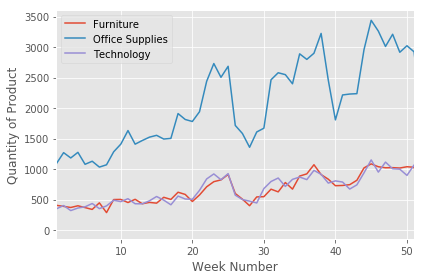

In [104]:
df2 = df[['quantity','order_date','category']]
df2.order_date = pd.to_datetime(df.order_date)
df2 = df2.groupby([df2.order_date.dt.strftime('%U'),df2.category]).agg({'quantity':'sum'})

plt.figure(figsize=(9,6))
df2.unstack().plot(kind='line',stacked=False)
plt.xlabel('Week Number')
plt.ylabel('Quantity of Product')
plt.xlim(1,51)
plt.tight_layout()
plt.legend(df2.unstack().columns.levels[1].values)
plt.grid(True)
#plt.xticks(np.arange(1,51,5))
plt.style.use('ggplot')

In [36]:
ret = pd.read_csv('../data/returns.csv')

In [239]:
df.columns

Index(['row_id', 'quantity', 'discount', 'shipping_cost', 'sales', 'profit',
       'order_priority_critical', 'order_priority_medium',
       'order_priority_low', 'row_id.1', 'order_id', 'order_date', 'ship_date',
       'customer_id', 'customer_name', 'ship_mode_first_class',
       'ship_mode_same_day', 'ship_mode_second_class', 'row_id.2',
       'customer_name.1', 'postal_code', 'city', 'state', 'country', 'region',
       'row_id.3', 'region.1', 'market', 'product_id', 'category',
       'sub_category', 'product_name'],
      dtype='object')

In [43]:
df3 = pd.merge(left = ret, right = df, how = 'outer',left_on ='Order ID',right_on = 'order_id')
df3 = df3[['Returned','customer_id','order_id','region','sales','profit','discount','shipping_cost']]
df3.Returned = df3.Returned.fillna(value='No')
df3.head(3)

,Returned,customer_id,order_id,region,sales,profit,discount,shipping_cost
0,Yes,SA-208301402,CA-2012-SA20830140-41210,Central US,2735.95,341.99,0.2,752.51
1,Yes,PB-19210127,IN-2012-PB19210127-41259,Eastern Asia,1715.16,720.36,0.0,725.57
2,Yes,PB-19210127,IN-2012-PB19210127-41259,Eastern Asia,2197.50,153.75,0.0,627.27


In [48]:
df3[['Returned']]

sales  profit  shipping_cost
customer_id  order_id                 Returned                                
AA-10315102  ID-2012-AA10315102-41093 No         404.73 -178.23         45.350
             ID-2015-AA10315102-42011 No         139.93   25.18         13.280
AA-10315120  ES-2013-AA10315120-41410 No        2713.41   27.09        167.350
AA-10315139  ES-2014-AA10315139-41901 No         185.88   63.00         56.720
             ES-2014-AA10315139-41970 No         164.70   29.61         34.690
             ES-2015-AA10315139-42220 No        2575.23  426.57        342.770
             IT-2015-AA10315139-42179 No          29.99   -4.51          2.010
AA-103151402 CA-2014-AA10315140-41702 No        4406.07 -747.09        286.720
             CA-2015-AA10315140-42185 No         374.48   96.51         32.220
AA-103151404 CA-2012-AA10315140-40998 No         726.55  267.42         58.130
             CA-2013-AA10315140-41551 No          26.96    7.01          5.230
AA-103151406 CA-2012-AA10315140-41166 No          29.50   13.28          3.300
AA-1031545   ES-2015-AA1031545-42356  No         368.27    4.31         53.290
AA-1031548   ES-2014-AA1031548-41858  No          68.15   22.67          5.350
AA-1031558   IN-2014-AA1031558-42004  No         499.44  179.76         30.630
             IN-2015-AA1031558-42361  Yes         45.99   13.32          2.570
AA-103157    ID-2015-AA103157-42241   No         355.32  -27.15         41.370
AA-1031582   MX-2012-AA1031582-41236  No         571.52  216.76         56.906
             MX-2014-AA1031582-41675  No          61.30   12.20          3.256
AA-103751    IN-2015-AA103751-42195   No        1075.47  417.12        133.930
AA-10375101  US-2014-AA10375101-41818 No         243.48 -436.72         75.984
AA-103751402 CA-2013-AA10375140-41307 No         178.37   62.07         60.100
AA-103751404 CA-2012-AA10375140-41019 No          16.52    5.58          1.970
             CA-2012-AA10375140-41205 No          34.27   11.14          2.060
             CA-2013-AA10375140-41402 No           5.25    0.59          1.610
             CA-2014-AA10375140-41831 No          16.77    1.47          1.990
AA-103751406 CA-2015-AA10375140-42350 No         149.87   42.37         13.330
             US-2015-AA10375140-42255 No          56.86   26.55          7.190
AA-103751408 CA-2013-AA10375140-41591 No          84.96    6.37         10.110
             CA-2014-AA10375140-41958 No         513.52  121.26        142.010
...                                                 ...     ...            ...
ZC-2191098   US-2014-ZC2191098-41842  No          86.67  -51.55          9.481
ZD-11925110  SA-2014-ZD11925110-41972 No         508.11  117.03         28.480
ZD-11925111  SG-2015-ZD11925111-42158 No         715.68  232.20        128.260
ZD-11925134  TU-2013-ZD11925134-41341 No          13.56   -8.16          2.020
ZD-11925137  UP-2014-ZD11925137-41950 No          45.36    6.72          3.620
ZD-1192538   EG-2015-ZD1192538-42366  No         140.58    9.78         13.440
ZD-1192560   IR-2014-ZD1192560-41954  No         383.49  130.14         61.170
ZD-1192561   IZ-2014-ZD1192561-41796  No         743.58  118.80         85.620
ZD-1192583   MD-2012-ZD1192583-41249  No         241.80   62.82         21.800
ZD-1192595   NI-2013-ZD1192595-41496  No         159.07 -190.91         16.330
ZD-21925102  IN-2013-ZD21925102-41578 No         285.97   24.79         20.160
ZD-2192511   IN-2012-ZD2192511-41247  No         530.19  113.55         51.530
             IN-2013-ZD2192511-41615  No         567.84   67.83         61.180
ZD-219251402 CA-2014-ZD21925140-41733 No         331.08  146.83         19.140
ZD-219251404 CA-2012-ZD21925140-41147 No         244.76   25.87         19.540
             CA-2015-ZD21925140-42167 No          61.44   16.59          8.470
ZD-219251408 CA-2014-ZD21925140-41829 No         839.94   56.50         71.670
             US-2014-ZD21925140-41765 No          16.72    3.34          1.930
ZD-2192518   MX-2014-